# Group Assignment 2: Data Preparation
#### Interactive-Visual Data Analysis, Fall 2024

# Group Eurotrash 
Max Zehnder (18-738-427), Marlon Gelpke (15-532-849), Mike Jason Frei (20-488-144), Hyeongseok Kim (23-741-903)

https://github.com/mikfre1/Eurotrash.git

## 1. Team Contributions:

- Max: Creating of Webpage and Visualizations together with Marlon. 
- Marlon: Creating of Webpage and Visualizations together with Max. 
- Mike: Initial data preprocessing and data wrangling. Followed by refinement together with Hyeongseok. 
- Hyeongseok: Further improved the data preprocessing and wrangling. Followed by refinement together with Mike.

## 2. Visualization Tool's Task


Please note that our tasks has been updated from our last report. We decided to focus more on deriving voting patterns.
Initial 3 tasks are more related to users enjoyment on history and music.


1) **Dominating Country**: The geographical mapping to explore the most enlisted countries encoded with color saturation. It is used to 'Analyze' contest to 'discover' majoring winning country by 'exploring' through the years. The user targets to discover outlying 'features'.
2) **Word Cloud**: Highlighting topics based on occurrence in the lyrics. It is used to 'Analyze' contest to 'discover' majoring theme of songs, by 'exploring' through the years. The user targets to discover trends and outlying features.
3) **Yearly ranking of Dominating countries**: The time series linear graph presenting the countries’ rankings by year. Is used to 'Query' through countries places over the years and 'look up' to 'Compare' between 2 competing countries.

<br>
Latter 2 tasks are more related to user goals to derive voting patterns.

4)  **Countries in favor**: Heatmap to present the most relevant voters in favor of the topic for the view. It is used to 'discover' the voting pattern of countries by 'exploring' over the years, targeting to find trends in voting pattern.
5)  **Clustering of Countries based on Voting**: It is to 'derive' the voting pattern based on current data. Trying to find 'correlation' in voting countries.


## 3. Characterization of Data
The code used for the preprocessing and wrangling can be found in the appendix.

In [14]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import missingno as msno

In [2]:
#Load Data
contestant_df = pd.read_csv('dataset/contestants.csv')
vote_df = pd.read_csv('dataset/votes.csv')

In [3]:
contestant_df.head()

,year,to_country_id,to_country,performer,song,place_contest,sf_num,running_final,running_sf,place_final,...,place_sf,points_sf,points_tele_final,points_jury_final,points_tele_sf,points_jury_sf,composers,lyricists,lyrics,youtube_url
0,1956,ch,Switzerland,Lys Assia,Refrain,2.0,NaN,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Georg Benz Stahl,NaN,"(Refrain d'amour...)\n\nRefrain, couleur du ci...",https://youtube.com/watch?v=IyqIPvOkiRk
1,1956,nl,Netherlands,Jetty Paerl,De Vogels Van Holland,2.0,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Cor Lemaire,Annie M. G. Schmidt,De vogels van Holland zijn zo muzikaal\nZe ler...,https://youtube.com/watch?v=u45UQVGRVPA
2,1956,be,Belgium,Fud Leclerc,Messieurs Les Noyés De La Seine,2.0,NaN,3.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jacques Say;Jean Miret,Robert Montal,Messieurs les noyés de la Seine\nOuvrez-moi le...,https://youtube.com/watch?v=U9O3sqlyra0
3,1956,de,Germany,Walter Andreas Schwarz,Im Wartesaal Zum Großen Glück,2.0,NaN,4.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Walter Andreas Schwarz,NaN,"Es gibt einen Hafen, da fährt kaum ein Schiff\...",https://youtube.com/watch?v=BDNARIDnmTc
4,1956,fr,France,Mathé Altéry,Le Temps Perdu,2.0,NaN,5.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,André Lodge,Rachèle Thoreau,"Chante, carillon\nLe chant du temps perdu\nCha...",https://youtube.com/watch?v=dm1L0XyikKI


In [4]:
vote_df.head()

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,at,nl,6,NaN,NaN
1,1957,final,at,fr,at,fr,0,NaN,NaN
2,1957,final,at,dk,at,dk,0,NaN,NaN
3,1957,final,at,lu,at,lu,3,NaN,NaN
4,1957,final,at,de,at,de,0,NaN,NaN


### 3-1. Feature's Data Type and Distributions of Values
The initial data in **Eurovision Song Contest** contains 2 data set, 'contestants.csv' and 'votes.csv'.<br><br>
#### a) Contestants.csv <br>
Information on Contestants dataset can be found below. Data types are consisted of integers, floats and strings. Some columns values are heavily distributed and we can suspect they contain some outliers or wrong values. (e.g. Diffrence between mean and amx value, such as `points_final`(75, 758) and `points_sf`(95, 403))

In [5]:
print(contestant_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1734 non-null   int64  
 1   to_country_id      1734 non-null   object 
 2   to_country         1734 non-null   object 
 3   performer          1734 non-null   object 
 4   song               1731 non-null   object 
 5   place_contest      1678 non-null   float64
 6   sf_num             640 non-null    float64
 7   running_final      1398 non-null   float64
 8   running_sf         605 non-null    float64
 9   place_final        1397 non-null   float64
 10  points_final       1385 non-null   float64
 11  place_sf           605 non-null    float64
 12  points_sf          605 non-null    float64
 13  points_tele_final  181 non-null    float64
 14  points_jury_final  181 non-null    float64
 15  points_tele_sf     212 non-null    float64
 16  points_jury_sf     212 n

In [6]:
print(contestant_df.describe())

              year  place_contest      sf_num  running_final  running_sf  \
count  1734.000000    1678.000000  640.000000    1398.000000  605.000000   
mean   1997.103806      14.968415    1.262500      11.425608    9.859504   
std      18.935907      10.470999    0.707549       6.718587    5.669580   
min    1956.000000       1.000000    0.000000       1.000000    1.000000   
25%    1982.000000       7.000000    1.000000       6.000000    5.000000   
50%    2002.000000      13.000000    1.000000      11.000000   10.000000   
75%    2013.000000      21.000000    2.000000      17.000000   14.000000   
max    2023.000000      43.000000    2.000000      27.000000   28.000000   

       place_final  points_final    place_sf   points_sf  points_tele_final  \
count  1397.000000   1385.000000  605.000000  605.000000         181.000000   
mean     11.262706     75.041155    9.852893   95.004959          91.325967   
std       6.739982     86.779039    5.661229   73.292585          95.126517   

#### b) votes.csv <br>
Below are information on votes dataset.<br>
Data types of votes dataset are consisted of integers, floats and strings. Some columns values are also heavily distributed, showing signs of outliers or wrong values. (e.g. Diffrence between mean and amx value, such as `total_points`(3, 24), `tele_points`(3, 12), and `jury_points`(3, 12))

In [7]:
print(vote_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51354 entries, 0 to 51353
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             51354 non-null  int64  
 1   round            51354 non-null  object 
 2   from_country_id  51354 non-null  object 
 3   to_country_id    51354 non-null  object 
 4   from_country     51354 non-null  object 
 5   to_country       51354 non-null  object 
 6   total_points     51354 non-null  int64  
 7   tele_points      11741 non-null  float64
 8   jury_points      11715 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.5+ MB
None


In [8]:
print(vote_df.describe())

               year  total_points   tele_points   jury_points
count  51354.000000  51354.000000  11741.000000  11715.000000
mean    2002.974199      3.121626      2.628056      2.628937
std       15.987289      4.401337      3.659772      3.660069
min     1957.000000      0.000000      0.000000      0.000000
25%     1994.000000      0.000000      0.000000      0.000000
50%     2008.000000      0.000000      0.000000      0.000000
75%     2015.000000      6.000000      5.000000      5.000000
max     2023.000000     24.000000     12.000000     12.000000


### 3-2. Data Quality: Missing and Extreme Values, Consistency, and Validity
#### a) Missing Values <br>
The contestants dataset contains several missing values.<br>
However, the missing values of the contestant and votes dataset shows clear pairing, for example `running_sf`, `place_sf`, and `points_sf` all have same number of data. We draw the line plot to find this pattern and irregular missing value. The patterns found with line plot are as follows.
- Semifinals are implemented from year 2004, with large increase in participating songs
- Tele-points and Jury-points are divided from year 2016
To address these missing values, we need to fill in the missing values, and manipulate datas to our needs concerning the patterns we found.

*[Occurrence of missing values for final points]*

![Occurrence of missing values for final points](dataset/Hist_NaN_points_final.png)


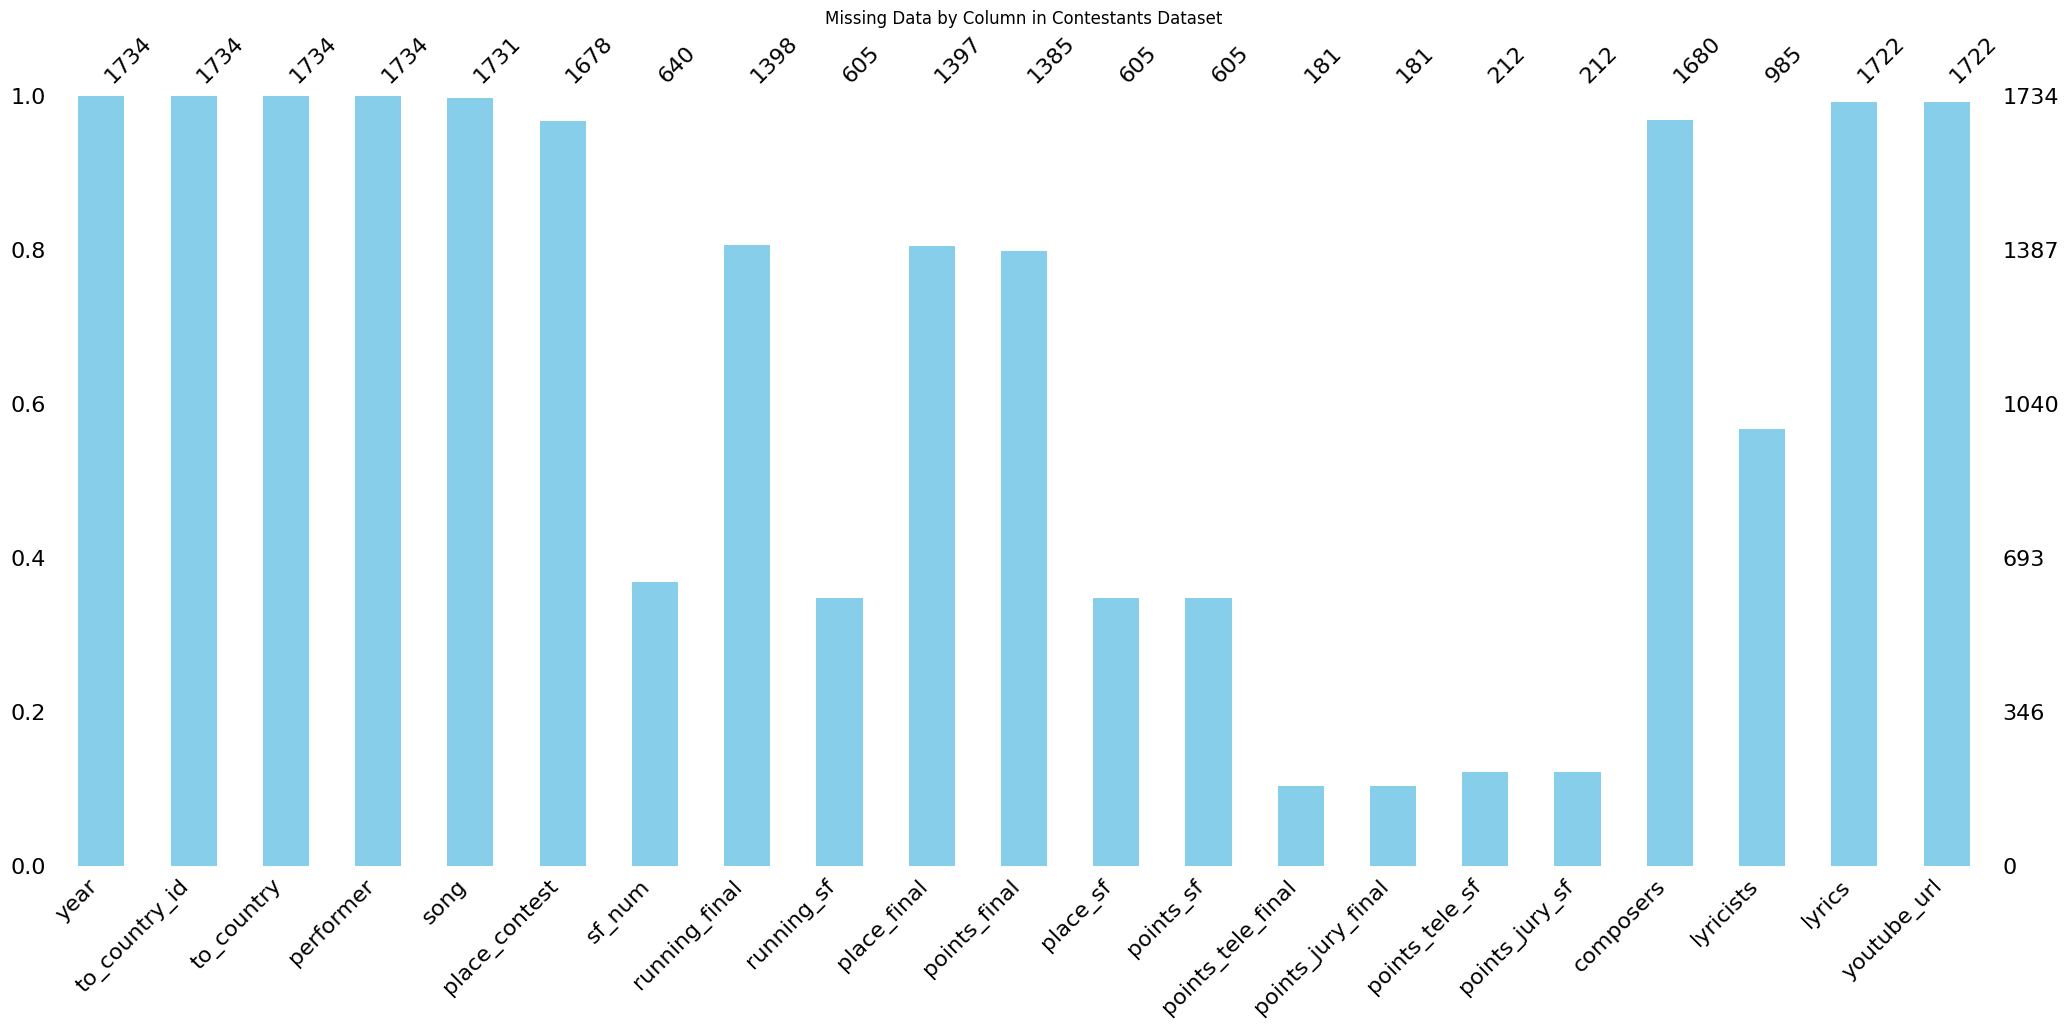

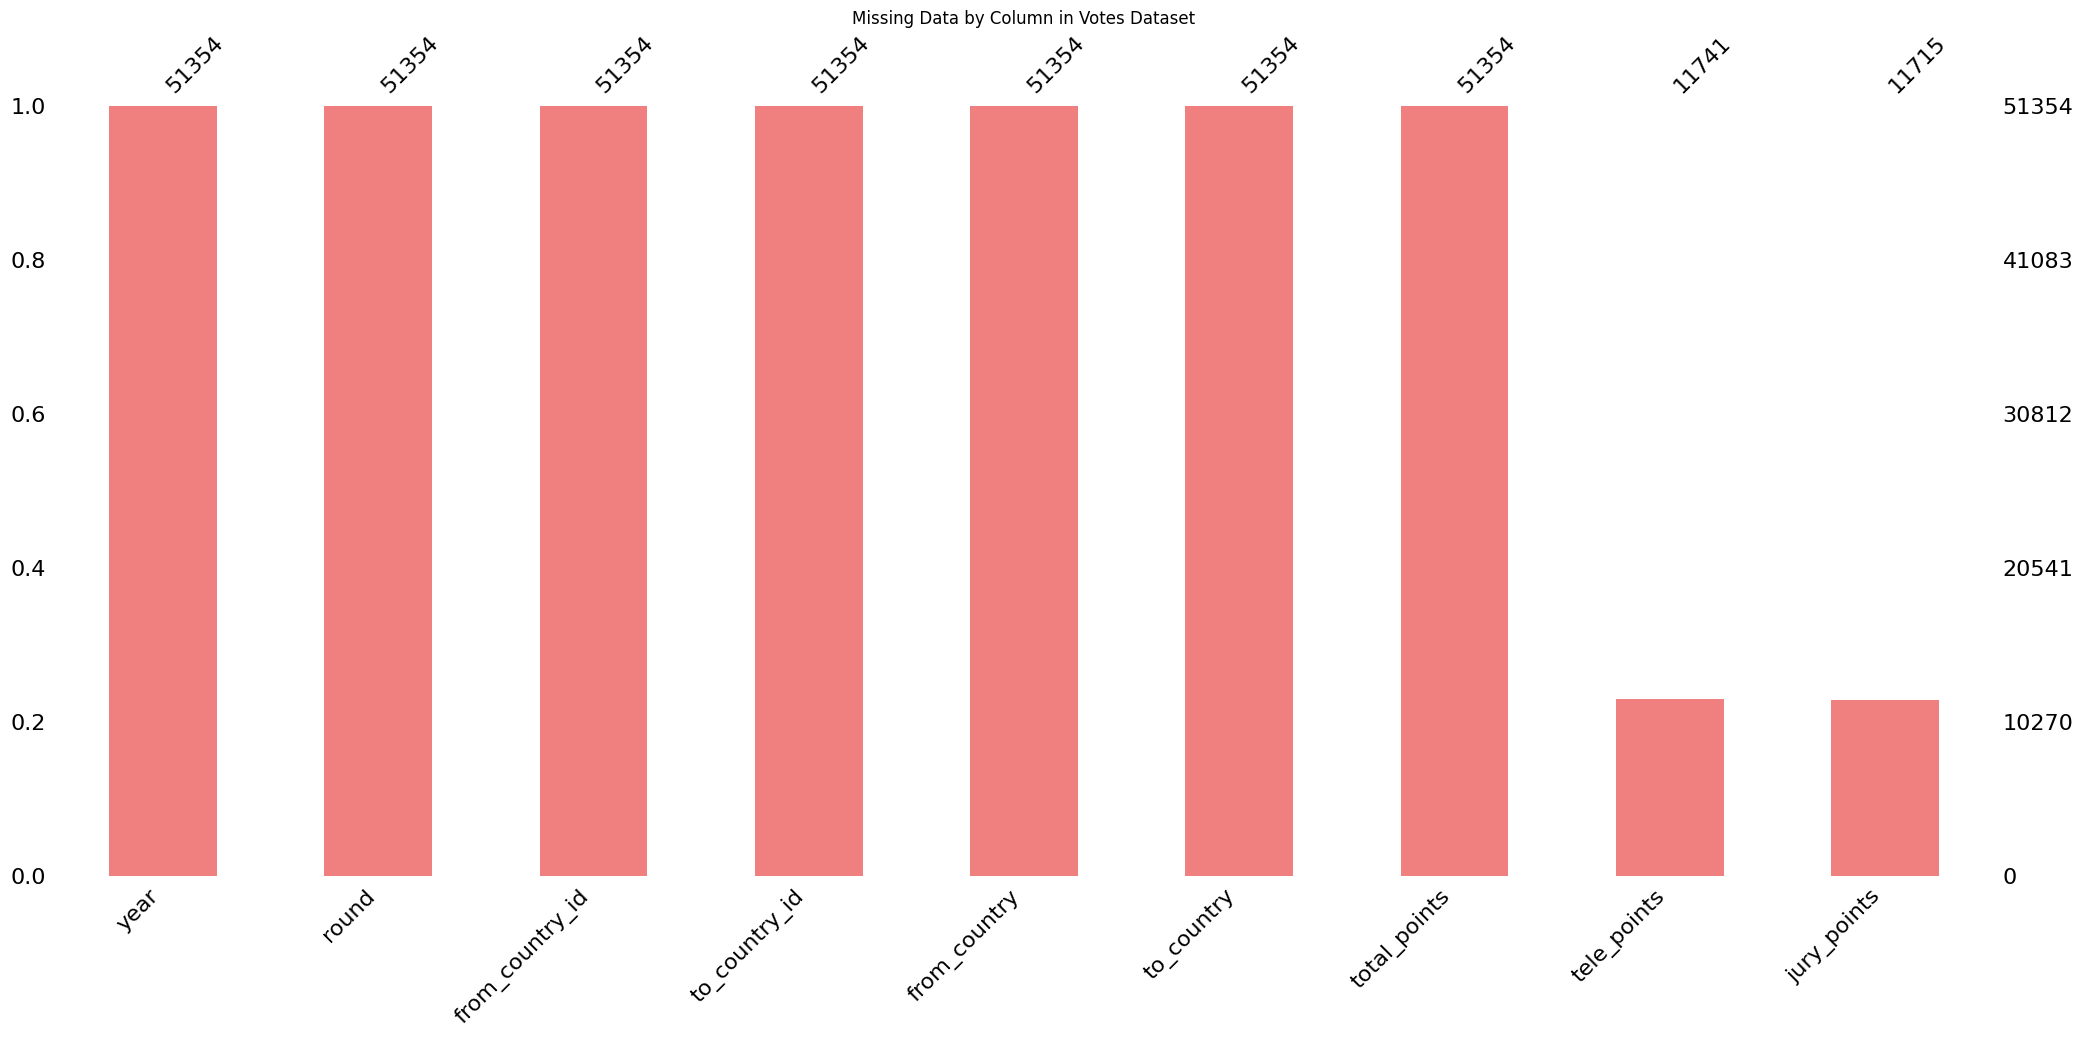

In [9]:
# Visualize missing data with bar charts
plt.figure(figsize=(5, 2))
msno.bar(contestant_df, color='skyblue')
plt.title("Missing Data by Column in Contestants Dataset")
plt.show()

plt.figure(figsize=(5, 2))
msno.bar(vote_df, color='lightcoral')
plt.title("Missing Data by Column in Votes Dataset")
plt.show()

In [10]:
fig = go.Figure()

values_counts = contestant_df.groupby('year')[['song', 'sf_num', 'running_final', 'running_sf', 'place_final','points_final', 'place_sf', 'points_sf', 'points_tele_final', 'points_jury_final', 'points_tele_sf', 'points_jury_sf', 'lyrics']].count()
values_counts = values_counts.replace(0, np.nan)

# Add lines for each feature
fig.add_trace(go.Scatter(x=values_counts.index, y=values_counts['song'], mode='lines+markers', name='song'))
fig.add_trace(go.Scatter(x=values_counts.index, y=values_counts['place_final'], mode='lines+markers', name='place_final'))
fig.add_trace(go.Scatter(x=values_counts.index, y=values_counts['points_sf'], mode='lines+markers', name='points_sf'))
fig.add_trace(go.Scatter(x=values_counts.index, y=values_counts['points_tele_final'], mode='lines+markers', name='points_tele_final'))
fig.add_trace(go.Scatter(x=values_counts.index, y=values_counts['points_tele_sf'], mode='lines+markers', name='points_tele_sf'))

# Customize layout
fig.update_layout(
    title='Features Count Over Years',
    xaxis_title='Year',
    yaxis_title='Counts',
    template='plotly',
    legend_title='Products',
    hovermode='x unified'
)

# Show the plot
fig.show()

#### b) Extreme Values and Outliers <br>
The points shows drastic changes over the years, resulting in heavy distribution. This is majorly due to changes in voting system, shown in [Voting at the Eurovision Song Contest](https://en.wikipedia.org/wiki/Voting_at_the_Eurovision_Song_Contest).
Spike in year 1971 is caused by changed voting system to distirbutes 10 points from 10 to 1 to favorites songs, from distribute 9 points juries got as a total. Doubled points in year 2016 is due to adopting telepoints.
The fall in year 1974 is also from reverting voting system to distribute 10 points juries got as a total, from changes in 1971.<br>
The *placesDistribution of Winners* over the years showed changes among the years. In the year 1956, no points nor place was publicated, all placed in 2nd. In year 1969, 4 countries are tied and got 1st place causing changes in voting system to prevent ties for winners. <br>
To address these distributions, we need measures to normalize points and deal with tied places.

*[The Distribution of Winners over the years]*


![Distribution of Winners](dataset/Dist_winner.png)



In [11]:
fig = go.Figure()

values_sum = contestant_df.groupby('year')[['song', 'sf_num', 'running_final', 'running_sf', 'place_final','points_final', 'place_sf', 'points_sf', 'points_tele_final', 'points_jury_final', 'points_tele_sf', 'points_jury_sf', 'lyrics']].sum()
values_sum = values_sum.replace(0, np.nan)

# Add lines for each feature
fig.add_trace(go.Scatter(x=values_sum.index, y=values_sum['points_final'], mode='lines+markers', name='points_final'))
fig.add_trace(go.Scatter(x=values_sum.index, y=values_sum['points_tele_final'], mode='lines+markers', name='points_tele_final'))
fig.add_trace(go.Scatter(x=values_sum.index, y=values_sum['points_jury_final'], mode='lines+markers', name='points_jury_final'))

# Customize layout
fig.update_layout(
    title='Total Points Sum Over Years',
    xaxis_title='Year',
    yaxis_title='Points',
    template='plotly',
    legend_title='Products',
    hovermode='x unified'
)

# Show the plot
fig.show()


#### c) Consistencies <br>
Below shows some inconsistencies in values from both database.
- Mislabeled data: `to_country_id` in contestant_df shows countries name, where it should be the id of the country. `from_country` and `to_country` in vote database are the opposite, showing the id of the country.
- Inconsistency in countries: `to_country` in contestant_df contains duplicated labels.(e.g. Czechia and Czech Republic, and North Macedonia and North MacedoniaN.Macedonia)
- Inconsistency in rounds: `sf_num` in contestant_df and `round` in vote_df shows inconsistency in labeling semi-finals. This is due to the change of semi-fianl rules, from introduction in 2004 to 2007, only one semi-final was present.
- Irregural value: The `from_country` in vote_df contains 'wld' in year 2023, showing the voting participation from the rest of the worlds.
- Number of values: `composer` and `lyricists` in contestant_df contains more than 2 values in it's data. composer or lyricists are separated with ';', showing more than 1 composer or lyricists participated in the song.
- Languages: The `lyrics` in contestant_df contains lyrics in multiple languages, other than English.

In [13]:
print('===> contestant_df')
for column in ['to_country','to_country_id', 'sf_num']:
    print(f'{column} : {np.sort(contestant_df[column].dropna().unique())}')
    print('--------------------------------------------------')

for column in ['composers', 'lyricists']:
    print(f'{column} : {np.sort(contestant_df[column].dropna().unique())[:5]}')
    print('--------------------------------------------------')

for column in ['lyrics']:
    print(f'{column} : {np.sort(contestant_df[column].dropna().unique())[:5][:30]}')

print('\n ===> vote_df')
for column in ['round', 'from_country', 'to_country']:
    print(f'{column} : {np.sort(vote_df[column].dropna().unique())}')
    print('--------------------------------------------------')

===> contestant_df
to_country : ['Albania' 'Andorra' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Belarus' 'Belgium' 'Bosnia & Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czech Republic' 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France'
 'Georgia' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Israel'
 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Monaco'
 'Montenegro' 'Morocco' 'Netherlands' 'North Macedonia'
 'North MacedoniaN.Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russia' 'San Marino' 'Serbia' 'Serbia & Montenegro' 'Slovakia'
 'Slovenia' 'Spain' 'Sweden' 'Switzerland' 'Turkey' 'Ukraine'
 'United Kingdom' 'Yugoslavia']
--------------------------------------------------
to_country_id : ['Albania' 'Andorra' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Belarus' 'Belgium' 'Bosnia & Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'Georgia' 'Greece'
 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Latvia' 'Lithuania' 'Ma

#### d) Validity <br>
Concerning the missing values, outliers, and consistencies, the data from the year 1956, 2020 and 2023 is considered invalid.<br>
In the year 1956, the points, place, and voting details were not disclosed. Also countries participated with 2 songs each, which largely differs from another years of the contests.<br>
In the year 2020, the contests itself was canceled due to the COVID-19 pandemic, and only the participants data is present.<br>
In the year 2023, the data is not gathered, and final scores are missing in this dataset.

In [14]:
contestant_df[contestant_df['year'].isin([1956, 2020, 2023])].head()

,year,to_country_id,to_country,performer,song,place_contest,sf_num,running_final,running_sf,place_final,...,place_sf,points_sf,points_tele_final,points_jury_final,points_tele_sf,points_jury_sf,composers,lyricists,lyrics,youtube_url
0,1956,ch,Switzerland,Lys Assia,Refrain,2.0,NaN,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Georg Benz Stahl,NaN,"(Refrain d'amour...)\n\nRefrain, couleur du ci...",https://youtube.com/watch?v=IyqIPvOkiRk
1,1956,nl,Netherlands,Jetty Paerl,De Vogels Van Holland,2.0,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Cor Lemaire,Annie M. G. Schmidt,De vogels van Holland zijn zo muzikaal\nZe ler...,https://youtube.com/watch?v=u45UQVGRVPA
2,1956,be,Belgium,Fud Leclerc,Messieurs Les Noyés De La Seine,2.0,NaN,3.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jacques Say;Jean Miret,Robert Montal,Messieurs les noyés de la Seine\nOuvrez-moi le...,https://youtube.com/watch?v=U9O3sqlyra0
3,1956,de,Germany,Walter Andreas Schwarz,Im Wartesaal Zum Großen Glück,2.0,NaN,4.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Walter Andreas Schwarz,NaN,"Es gibt einen Hafen, da fährt kaum ein Schiff\...",https://youtube.com/watch?v=BDNARIDnmTc
4,1956,fr,France,Mathé Altéry,Le Temps Perdu,2.0,NaN,5.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,André Lodge,Rachèle Thoreau,"Chante, carillon\nLe chant du temps perdu\nCha...",https://youtube.com/watch?v=dm1L0XyikKI


In [15]:
vote_df[vote_df['year'].isin([1956,2020, 2023])].head()

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
50366,2023,final,al,se,al,se,22,10.0,12.0
50367,2023,final,al,fi,al,fi,6,6.0,0.0
50368,2023,final,al,il,al,il,11,5.0,6.0
50369,2023,final,al,it,al,it,14,12.0,2.0
50370,2023,final,al,no,al,no,4,4.0,0.0


### 3-3. Information on Our Goal.
To visualize and model with these datasets, we need the following processes:
- Filling in missing values: The missing values outside of the pattern recognized in 3-1, need to be filled in(e.g. songs, lyricists). We will run additional search to get the missing values.
- Standardize points: Standardilzation of points is required to run through multi-year summation and comparision. Regarding the rules have changed many times, we need to adopt method to deal with changes(e.g. percentage on maximum points contestant can get).
- Refactor inconsistent values: Mislabeled and inconsistent number of data should be modified to avoid errors in visualization process. We need to manipulate dataframe to meet the visualization's needs.
- Lyrics manipulation: To create word cloud, the lyrics should be reformed in single language(English preferred) and tokenized in dataset. We need to either translate the lyrics or find additional source of lyrics, and run through LLM to tokenize the relevant words.

## 4. Implementation of Data Preparation Goals

### 4-1. Data Wrangling Progress and Results

#### a) Invalid data
Firstly, we removed invalid datasets from the data. We removed the years 1956, 2020, and 2023, as voting data from such years are not provided. <br>
Also, irrelevant data columns for the visulization is moved from datasets.

In [175]:
contestant_df_cleaning = contestant_df[~contestant_df['year'].isin([1956, 2020, 2023])]
vote_df_cleaning = vote_df[vote_df['year'] != 2023]

#### b) Inconsistent Data Labeling

The inconsistnt data related to countries, `to_country_id` and `to_country`, is correctly re-labeled.
(e.g. Czechia to Czech Republic, North MacedoniaN.Macedonia to North Macedonia)

In [176]:
# Replace 'Czechia' with 'Czech Republic' in the 'to_country' column
contestant_df_cleaning.loc[:, 'to_country'] = contestant_df_cleaning['to_country'].replace('Czechia', 'Czech Republic')
# Replace 'Czechia' with 'Czech Republic' in the 'to_country' column
contestant_df_cleaning.loc[:, 'to_country'] = contestant_df_cleaning['to_country'].replace('North MacedoniaN.Macedonia', 'North Macedonia')


# Dictionary mapping country names to their corresponding codes
country_code_mapping = {
    'Switzerland': 'ch', 'North Macedonia': 'mk', 'Latvia': 'lv', 
    'Slovenia': 'si', 'Belarus': 'by', 'Belgium': 'be', 'Montenegro': 'me',
    'Portugal': 'pt', 'Estonia': 'ee', 'Netherlands': 'nl', 'Poland': 'pl', 
    'San Marino': 'sm', 'Finland': 'fi', 'Ireland': 'ie', 'Bulgaria': 'bg', 
    'Malta': 'mt', 'Iceland': 'is', 'Lithuania': 'lt', 'Albania': 'al',
    'Croatia': 'hr', 'Cyprus': 'cy', 'Israel': 'il', 'Andorra': 'ad', 
    'Austria': 'at', 'Moldova': 'md', 'Czech Republic': 'cz', 'Georgia': 'ge', 
    'Slovakia': 'sk', 'Denmark': 'dk', 'Hungary': 'hu', 'Armenia': 'am', 
    'Monaco': 'mc', 'Norway': 'no', 'Serbia': 'rs', 'Romania': 'ro', 
    'Greece': 'gr', 'Sweden': 'se', 'Turkey': 'tr', 'Bosnia & Herzegovina': 'ba', 
    'Azerbaijan': 'az', 'Russia': 'ru'
}

# Replace country names in the 'to_country_id' column with corresponding codes
contestant_df_cleaning.loc[:, 'to_country_id'] = contestant_df_cleaning['to_country_id'].replace(country_code_mapping)

#### C) Normalization of Values

As the voting rule has been consistently changed, all the points should be normalized along the years.
Firstly, we tried MinMax normalization, based on yearly minimum and maximum points. However, all the winners are scored 100, causing comparing winners between diffrent years impossible.<br>
To make it possible, we created new norm `percentage on maximum points possible`. It works as following:
- Based on the voting rule, calculate maximum points one contestant can get as a maximum value instead of winner's point.(e.g. the maximum point possible based on voting rule)
- re-Calculate MinMax as `percentage on maximum points possible`<br>

This also allows to compare the received points of winners in a meaningful way. To give an example, we are now able to compare how well a song from 1990 performed in comparison to a winning song in 2010 based on how many points it received. If the song in 2010 got fewer points than the song in 1990 it could mean that either the competing songs in 2010 were quite good as well and thus the points got distributed more. 

In the graph below, the nomralized point of winning country(1st place) spans from 0 to 100, compared to highly varied original points. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min, max = 0, 100

# Inital MinMax normalization  #NOTE: As rules change by the years, calculated on yearly basis rather than using MinMaxScaler()
def min_max(x):
    target =contestant_df_cleaning[(contestant_df_cleaning['year'] == x['year']) & (contestant_df_cleaning['points_final'] != 'not_qualified')].copy()
    result = min + (x['points_final'] - target['points_final'].min()) * (max-min)  / (target['points_final'].max() - target['points_final'].min())
    return result

contestant_df_cleaning['min_max'] = contestant_df_cleaning.apply(min_max, axis= 1)

# MinMax using maximum points possible
voting_calculation_df = pd.read_excel('dataset/voting_calculation.xlsx')
contestant_df_cleaning = pd.merge(contestant_df_cleaning, voting_calculation_df[['year', 'total_without_contestant']], on='year', how='left')

contestant_df_cleaning['per_of_pot_max'] = round((contestant_df_cleaning['points_final'] / contestant_df_cleaning['total_without_contestant']) * 100,1)


# Application for vote_df
vote_df_cleaning = vote_df.merge(voting_calculation_df[['year', 'max points per country']], on='year', how='left')

# Calculate perc_of_max for 'final' rounds only
vote_df_cleaning['perc_of_max'] = None  # Initialize the column
vote_df_cleaning.loc[vote_df_cleaning['round'] == 'final', 'perc_of_max'] = (
    (vote_df_cleaning['total_points'] / vote_df_cleaning['max points per country']) * 100
).round(2)
vote_df_cleaning.loc[vote_df_cleaning['round'] != 'final', 'perc_of_max'] = "no final round"

In [180]:
winning_points = contestant_df_cleaning.loc[contestant_df_cleaning['place_final'] == 1.0].groupby('year')['points_final'].mean()
nomalized_points = contestant_df_cleaning.loc[contestant_df_cleaning['place_final'] == 1.0].groupby('year')['per_of_pot_max'].mean()
minmax_point = contestant_df_cleaning.loc[contestant_df_cleaning['place_final'] == 1.0].groupby('year')['min_max'].mean()

# Plot for Points to Winning Country by Year
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=winning_points.index, y=winning_points.values,
    mode='lines+markers', name="Original Points", marker=dict(symbol='circle')))

fig.add_trace(go.Scatter(
    x=minmax_point.index, y=minmax_point.values,
    mode='lines+markers', name="Naive MinMax", marker=dict(symbol='square')))

fig.add_trace(go.Scatter(
    x=nomalized_points.index, y=nomalized_points.values,
    mode='lines+markers', name="Final Normalization", marker=dict(symbol='x')))

fig.update_layout(
    title="Points to Winning Country by Year",
    xaxis_title="Year", yaxis_title="Winning Country Points",
    template='plotly', legend=dict(title="Legend"))

fig.show()

#### d) Missing values and Data cleanup
**contestants_df**
1) We fill the simple missing values, that are not within the patterns we found.
    - Song: The 3 missing songs name are identical to performer's name based on [Eurovision](https://eurovisionworld.com/).

2) Remove unnecessary data for the visualization
    - sf_num: No need to know about semifinals
    - running_final: No need to know about broadcast order (who performs when)
    - running_sf: No need to know about broadcast order (who performs when)
    - place_sf: No interest in Semifinal
    - points_sf: No interest in Semifinal
    - points_tele_sf: No interest in Semifinal
    - points_jury_sf: No interest in Semifinal
    - Lyrics: We added our own
    - lyricists: No interest

3) missing data from `place_final` and `points_final` will be filled with non-qualified.
    - For the countries that dont qualify through the semifinal, the place_final and points_final are missing and will be changed to non-qualified.

4) Missing Youtube Urls have been added manually.

5) Composers have been manually added. If there was no composer available the songwriters were chosen instead.

**Votes_df**
1) Dropped the following:
    - Year 2023 as not included in dataset
    - to_country and to_country_id hold the same values, one is dropped. Same for from_country and from_country_id


In [181]:
# Drop the specified columns
columns_to_drop = [
    'sf_num', 'running_final', 'running_sf', 
    'place_sf', 'points_sf', 'points_tele_sf', 'points_jury_sf', 'lyricists', 'lyrics'
]

contestant_df_cleaning = contestant_df_cleaning.drop(columns=columns_to_drop)

In [182]:
contestant_df_filled = contestant_df.copy()
# Fix missing Song Titles
missing_songs = contestant_df_cleaning[contestant_df_cleaning['song'].isna()].copy()
contestant_df_cleaning.loc[:, 'song'] = contestant_df_cleaning['song'].fillna(contestant_df_cleaning['performer'])
missing_songs

,year,to_country_id,to_country,performer,song,place_contest,place_final,points_final,points_tele_final,points_jury_final,composers,youtube_url,min_max,total_without_contestant,per_of_pot_max
354,1979,de,Germany,Dschinghis Khan,NaN,4.0,4.0,86.0,NaN,NaN,Ralph Siegel,https://youtube.com/watch?v=eAEUrp2V4ss,67.500000,216,39.8
696,1995,gb,United Kingdom,Love City Groove,NaN,10.0,10.0,76.0,NaN,NaN,Beanz;Jay Williams;Paul Hardy;Tatsiana Mais,https://youtube.com/watch?v=IV_vJOWMWWY,51.020408,264,28.8
1140,2009,be,Belgium,Copycat,NaN,41.0,NaN,NaN,NaN,NaN,Miam Monster Miam,https://youtube.com/watch?v=8qVdSbiYT8w,NaN,492,NaN


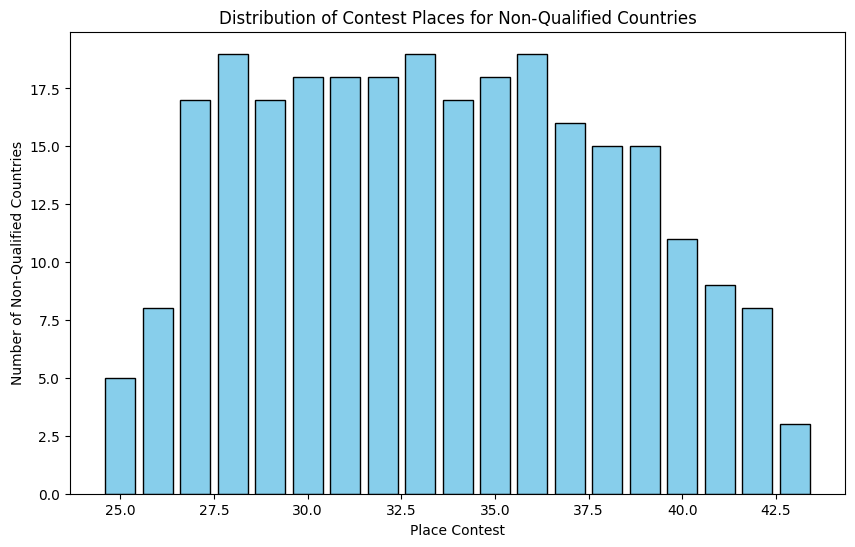

In [183]:
# Filter rows where 'place_final' is NaN (indicating the country didn't qualify)
non_qualified = contestant_df_cleaning[contestant_df_cleaning['place_final'].isna()]
# Count occurrences of each 'place_contest' value for non-qualified countries
place_counts = non_qualified['place_contest'].value_counts().sort_index()
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(place_counts.index, place_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Place Contest')
plt.ylabel('Number of Non-Qualified Countries')
plt.title('Distribution of Contest Places for Non-Qualified Countries')
plt.show()

contestant_df_cleaning[['place_final', 'points_final']] = contestant_df_cleaning[['place_final', 'points_final']].astype('object')
# Replace NaN values in the 'place_contest' column with "Non-Qualified"
contestant_df_cleaning.loc[(contestant_df_cleaning['place_final'].isna()), 'place_final'] = 'not_qualified'

# Replace NaN values in 'points_final' with "not_qualified"
contestant_df_cleaning.loc[(contestant_df_cleaning['points_final'].isna()), 'points_final'] = 'not_qualified'

In [185]:
# Visualize missing data with bar charts
original = contestant_df[['year', 'to_country_id', 'to_country', 'performer', 'song', 'place_contest', 'place_final', 'points_final', 'points_tele_final', 'points_jury_final', 'composers', 'youtube_url']]
cleaninng = contestant_df_cleaning[['year', 'to_country_id', 'to_country', 'performer', 'song', 'place_contest', 'place_final', 'points_final', 'points_tele_final', 'points_jury_final', 'composers', 'youtube_url']]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=original.columns, y=original.count(),
    name="Default data"))

fig.add_trace(go.Bar(
    x=cleaninng.columns, y=cleaninng.count(),
    name="cleaned data"))

fig.update_layout(
    title="Data before and after cleaning",
    xaxis_title="Category", yaxis_title="Counts",
    barmode='group',template='plotly'
)

fig.show()


#### e) Additional Features

To create visualization additional features were attached.
 - English Lyrics Tokenization: For the word cloud, english lyrics were scrapped from Eurovision website, and tokenized.
 - Geographical regions: The geographical region of each county is added to show voting patterns based on regions.<br> *for Data Scrapping codes, refer to `Appendix`*

In [ ]:
from tqdm import tqdm
from collections import Counter
import spacy
import ast

nlp = spacy.load("en_core_web_sm")
tqdm.pandas()

exceptions = ['thing', 'word', '-', 'o', '¿', '…', 'ti', 'este', 'oh', 'iѕ', 'не','yo', 'te', 'sang','u','să', 'no', 'na', 'что','go', 'fi', 'por', 'yay', 'ooh', 'ou', 'whoa', 'mă', 'si', 'mai','тебе' , 'μου' ,'et', 'она'   ]

def tokenizer(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if (token.pos_ in {"NOUN"} and token not in exceptions)]

contestant_df_cleaned['lyrics_token'] = contestant_df_cleaned['lyrics_english'].progress_apply(tokenizer)
# tokens = contestant_df_cleaned['lyrics_english'].progress_apply(tokenizer)

100%|██████████| 1629/1629 [01:49<00:00, 14.93it/s]


In [ ]:
region_raw = pd.read_csv('dataset/countries.csv')
region_df = region_raw[['region']].copy()

region_df['to_country_id'] = region_raw['country'].apply(lambda x: x.lower())
contestant_df_cleaned = pd.merge(contestant_df_cleaned, region_df, on='to_country_id', how='left')
contestant_df_cleaned.head()


,year,to_country_id,to_country,performer,song,place_contest,place_final,points_final,points_tele_final,points_jury_final,...,winner,top5,finalist,lyrics_english,total_without_contestant,per_of_pot_max,lyrics_token,tele_percentage,jury_percentage,region
0,1957,nl,Netherlands,Corry Brokken,Net Als Toen,1.0,1.0,31.0,NaN,NaN,...,1,1,1,Don't be so drowsy with that eternal paper\r\n...,90,34.4,"['drowsy', 'eternal', 'paper', 'yawn', 'sleep'...",NaN,NaN,Western Europe
1,1957,fr,France,Paule Desjardins,La Belle Amour,2.0,2.0,17.0,NaN,NaN,...,0,1,1,"If you like nature, lilacs and birdies\r\nMusc...",90,18.9,"['like', 'nature', 'lilac', 'birdie', 'fry', '...",NaN,NaN,Western Europe
2,1957,dk,Denmark,Birthe Wilke & Gustav Winckler,Skibet Skal Sejle I Nat,3.0,3.0,10.0,NaN,NaN,...,0,1,1,"Goodbye then, my lass, stay well\r\nI confess,...",90,11.1,"['lass', 'stay', 'confess', 'heart', 'give', '...",NaN,NaN,Northern Europe
3,1957,lu,Luxembourg,Danièle Dupré,Amours Mortes (Tant De Peine),4.0,4.0,8.0,NaN,NaN,...,0,1,1,"You, that I love\r\nYou made me so much sad\r\...",90,8.9,"['love', 'make', 'sad', 'erase', 'pass', 'day'...",NaN,NaN,Western Europe
4,1957,de,Germany,Margot Hielscher,"Telefon, Telefon",4.0,4.0,8.0,NaN,NaN,...,0,1,1,Hello – how do you do?\r\nHello – thank you ve...,90,8.9,"['do', 'thank', 'hear', 'country', 'thank', 'h...",NaN,NaN,Western Europe


### 4-2. Data Modeling Progress and Results
The following two interactive visuals are presented to the user. 


#### Comment
The two visualizations highlight Eurovision voting and non-voting behaviors for the selected time period, focusing on final rounds.

In the **voting visualization**, countries such as `de` (Germany), `se` (Sweden), and `nl` (Netherlands) form a prominent cluster, reflecting frequent voting exchanges within Western and Northern Europe. Conversely, countries like `fr` (France) and `ch` (Switzerland) cluster together, indicating shared voting tendencies but with limited alignment to other Western nations. Eastern European countries, including `ua` (Ukraine), `am` (Armenia), and `ru` (Russia), appear in a separate group, underscoring strong regional bloc voting within Eastern Europe.

Both visualizations are influenced by the varying frequency of country participation over the years, which affects clustering results. This limitation is most pronounced when analyzing all years at once, as we are doing here, leading to stronger biases. Users can reduce this bias by exploring shorter time horizons, which allow for a more accurate and dynamic analysis of voting and non-voting behaviors over specific periods.


Clustering of countries according to their voting behaviour. 

![Clustering of Votes](dataset/Clustering_voting.png)



Clustering of countries according to their non-voting behaviour. 

![Clustering of non-votes](dataset/Clustering_non_voting.png)



### 5. Reflection 

 Our data wrangling and modeling decisions effectively address missing values and inconsistent data, ensuring robustness for the tasks at hand. Replacing missing values and standardizing points are crucial steps for data integrity. Dropping irrelevant columns further streamlined the dataset, allowing for more efficient analysis.

The modeling choices, such as clustering voting and non-voting behaviors using KMeans, align well with the objective of understanding Eurovision patterns. The PCA dimensionality reduction aids in visualizing high-dimensional voting relationships, enhancing interpretability.

However, refinements could include:
- Exploring alternative clustering techniques, like hierarchical clustering, to capture other perspectives.
- Come up with a solution to let the participation rate of countries be meaningful.

These refinements could provide deeper insights and further strengthen task alignment

# Appendix
The following holds the code used for the data wrangling and modeling. 

#### Data Wrangling

In [ ]:
# Fix missing Song Titles
contestant_df['song'].fillna(contestant_df['performer'], inplace=True)


#Remove countries from 1956, 2020 and 2023
contestant_df = contestant_df[~contestant_df['year'].isin([1956, 2020, 2023])]


# List of columns to drop
columns_to_drop = [
    'sf_num', 'running_final', 'running_sf', 
    'place_sf', 'points_sf', 'points_tele_sf', 'points_jury_sf', 'lyricists', 'lyrics'
]


# Drop the specified columns
contestant_df = contestant_df.drop(columns=columns_to_drop)


# Filter rows where 'place_final' is NaN (indicating the country didn't qualify)
non_qualified = contestant_df[contestant_df['place_final'].isna()]
# Count occurrences of each 'place_contest' value for non-qualified countries
place_counts = non_qualified['place_contest'].value_counts().sort_index()
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(place_counts.index, place_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Place Contest')
plt.ylabel('Number of Non-Qualified Countries')
plt.title('Distribution of Contest Places for Non-Qualified Countries')
plt.show()
# Replace NaN values in the 'place_contest' column with "Non-Qualified"
contestant_df['place_final'].fillna('non-qualified', inplace=True)


# Replace NaN values in 'points_final' with "not_qualified"
contestant_df.loc[(contestant_df['points_final'].isna()), 'points_final'] = 'not_qualified'


# Create the 'winner' column: 1 if 'place_contest' is 1, otherwise 0
contestant_df['winner'] = contestant_df['place_contest'].apply(lambda x: 1 if x == 1 else 0)
# Create 'top5' column: 1 if 'place_contest' is between 1 and 5, otherwise 0
contestant_df['top5'] = contestant_df['place_contest'].apply(lambda x: 1 if 1 <= x <= 5 else 0)
# Create 'finalist' column: 1 if 'place_final' is not 'non-qualified', otherwise 0
contestant_df['finalist'] = contestant_df['place_final'].apply(lambda x: 0 if x == 'non-qualified' else 1)


# Replace 'Czechia' with 'Czech Republic' in the 'to_country' column
contestant_df['to_country'] = contestant_df['to_country'].replace('Czechia', 'Czech Republic')
# Replace 'Czechia' with 'Czech Republic' in the 'to_country' column
contestant_df['to_country'] = contestant_df['to_country'].replace('North MacedoniaN.Macedonia', 'North Macedonia')


# Dictionary mapping country names to their corresponding codes
country_code_mapping = {
    'Switzerland': 'ch', 'North Macedonia': 'mk', 'Latvia': 'lv', 
    'Slovenia': 'si', 'Belarus': 'by', 'Belgium': 'be', 'Montenegro': 'me',
    'Portugal': 'pt', 'Estonia': 'ee', 'Netherlands': 'nl', 'Poland': 'pl', 
    'San Marino': 'sm', 'Finland': 'fi', 'Ireland': 'ie', 'Bulgaria': 'bg', 
    'Malta': 'mt', 'Iceland': 'is', 'Lithuania': 'lt', 'Albania': 'al',
    'Croatia': 'hr', 'Cyprus': 'cy', 'Israel': 'il', 'Andorra': 'ad', 
    'Austria': 'at', 'Moldova': 'md', 'Czech Republic': 'cz', 'Georgia': 'ge', 
    'Slovakia': 'sk', 'Denmark': 'dk', 'Hungary': 'hu', 'Armenia': 'am', 
    'Monaco': 'mc', 'Norway': 'no', 'Serbia': 'rs', 'Romania': 'ro', 
    'Greece': 'gr', 'Sweden': 'se', 'Turkey': 'tr', 'Bosnia & Herzegovina': 'ba', 
    'Azerbaijan': 'az', 'Russia': 'ru'
}

# Replace country names in the 'to_country_id' column with corresponding codes
contestant_df['to_country_id'] = contestant_df['to_country_id'].replace(country_code_mapping)


# Example of adding a URL based on conditions
country_id = 'cy'
contestant_df.loc[(contestant_df['year'] == 2022) & (contestant_df['to_country_id'] == country_id), 'youtube_url'] = 'https://youtu.be/W2IUdTl-gAI'

# --------------SCRAPPER-------------------------------------
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd
# import time
# import random
# 
# def get_lyrics(year, country_name):
#     url = f"https://eurovisionworld.com/eurovision/{year}/{country_name}"
#     print(f"Fetching URL: {url}")
#     
#     # Headers to mimic a real browser request
#     headers = {
#         'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36',
#         'Accept-Language': 'en-US,en;q=0.9',
#     }
#     
#     # Make the request
#     response = requests.get(url, headers=headers)
#     
#     if response.status_code == 200:
#         soup = BeautifulSoup(response.text, 'html.parser')
#         
#         # Try multiple selectors to find the English lyrics section
#         possible_selectors = [
#             ('div', {'class': 'lyrics_div lyr_div lyr_desktop', 'data-lyrics-language': "1"}),
#             ('div', {'class': 'lyrics_div lyr_div', 'data-lyrics-language': "1"}),
#             ('div', {'class': 'lyrics_div_wrap mm'}),
#         ]
#         
#         lyrics_div = None
#         for tag, attrs in possible_selectors:
#             lyrics_div = soup.find(tag, attrs)
#             if lyrics_div:
#                 print(f"English lyrics section found with selector: {tag}, {attrs}")
#                 break
#         
#         if lyrics_div:
#             # Extract lyrics text, handling <p> and <br> tags
#             lyrics_lines = []
#             for paragraph in lyrics_div.find_all('p'):
#                 line_text = paragraph.get_text(separator="\n").strip()
#                 lyrics_lines.append(line_text)
#             return "\n".join(lyrics_lines)
#         else:
#             print("English lyrics section not found; trying alternative selectors.")
#             for tag, attrs in possible_selectors[1:]:  # Skip first, as it’s already tried
#                 lyrics_div = soup.find(tag, attrs)
#                 if lyrics_div:
#                     print(f"Fallback lyrics section found with selector: {tag}, {attrs}")
#                     lyrics_lines = []
#                     for paragraph in lyrics_div.find_all('p'):
#                         line_text = paragraph.get_text(separator="\n").strip()
#                         lyrics_lines.append(line_text)
#                     return "\n".join(lyrics_lines)
#             print("No lyrics found after trying all selectors.")
#     else:
#         print(f"Failed to fetch page: {response.status_code}")
#     return None
# 
# 
# # Loop through each sampled row to fetch lyrics with progress tracking
# sampled_lyrics_data = []
# total_rows = len(contestant_df)
# for index, row in contestant_df.iterrows():
#     year = row['year']
#     country_name = row['to_country'].lower().replace(" ", "-")  # Format for URL
#     
#     # Get lyrics and handle any exceptions
#     try:
#         lyrics = get_lyrics(year, country_name)
#         sampled_lyrics_data.append(lyrics)
#         print(f"Lyrics fetched for {year} {country_name} [{index + 1}/{total_rows}]")
#     except Exception as e:
#         print(f"Failed to fetch lyrics for {year} {country_name} [{index + 1}/{total_rows}]: {e}")
#     
#     # Wait to avoid overloading the server
#     time.sleep(random.uniform(0.5, 0.8))
# 
# # Add the fetched lyrics data to the DataFrame
# contestant_df['lyrics_english'] = sampled_lyrics_data
# ---------------------------------------------------

# Votes dataset
vote_df = vote_df[vote_df['year'] != 2023]
vote_df.drop(['from_country', 'to_country'], axis=1, inplace=True)

# Merge the dataframes on the "year" column
merged_df = pd.merge(contestant_df, voting_calculation_df[['year', 'total_without_contestant']], on='year', how='left')

# Calculate the percentage of points_final compared to total_without_contestant
merged_df['per_of_pot_max'] = round((merged_df['points_final'] / merged_df['total_without_contestant']) * 100,1)

# Keep only the necessary columns for the updated contestants_df
contestant_df = merged_df
contestant_df['per_of_pot_max'] = contestant_df['per_of_pot_max'].fillna(0)

# Calculate the new columns
contestant_df['tele_percentage'] = (
    (contestant_df['points_tele_final'] / contestant_df['total_without_contestant']) * 100
).round(1)

contestant_df['jury_percentage'] = (
    (contestant_df['points_jury_final'] / contestant_df['total_without_contestant']) * 100
).round(1)

# Calculate the new columns
vote_df['tele_percentage'] = (
    (vote_df['tele_points'] / vote_df['max points per country']) * 100
).round(1)

vote_df['jury_percentage'] = (
    (vote_df['jury_points'] / vote_df['max points per country']) * 100
).round(1)

vote_df['perc_of_max'] = pd.to_numeric(vote_df['perc_of_max'], errors='coerce').round(1)


#### Clustering Code

In [3]:
# Imports
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [4]:
#Load Data
vote_df = pd.read_csv('dataset/votes_cleaned.csv')

##### Data Preparation

In [5]:
# Filter the data for `round = final`
final_round_votes = vote_df[vote_df['round'] == 'final']
n_clusters = 5 # Replace with the desired number of clusters MAX 9

# Pivot table to create the voting matrix using `perc_of_max`
voting_matrix_perc_of_max = final_round_votes.pivot_table(
    index='from_country_id',
    columns='to_country_id',
    values='perc_of_max',
    aggfunc='sum',
    fill_value=0
)


# To display the voting matrix nicely in Jupyter Notebook
# voting_matrix_perc_of_max.style.format(precision=2)


# Clustering markers generation
def generate_markers(num_clusters):
    """
    Generate a list of unique markers for the specified number of clusters.
    """
    # Common marker shapes in matplotlib
    base_markers = base_markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*']
    
    # If the number of clusters exceeds the number of unique markers, repeat them cyclically
    markers = [base_markers[i % len(base_markers)] for i in range(num_clusters)]
    
    return markers


##### KMeans Clustering for the proportional point distribution

In [ ]:
# Reduce dimensions for visualization using PCA
pca1 = PCA(n_components=2)  # Reducing to 2 dimensions for scatterplot
voting_matrix_2d = pca1.fit_transform(voting_matrix_perc_of_max)
explained_variance1 = pca1.explained_variance_ratio_

# Perform clustering
kmeans_voting = KMeans(n_clusters=n_clusters, random_state=42)  # Specify number of clusters
clusters_voting = kmeans_voting.fit_predict(voting_matrix_perc_of_max)
shapes = generate_markers(n_clusters)

# Create a scatterplot for the normal voting clustering
plt.figure(figsize=(12, 10))
for cluster_id in range(n_clusters):  # Iterates over the specified number of clusters
    cluster_indices = [i for i, c in enumerate(clusters_voting) if c == cluster_id]
    plt.scatter(
        voting_matrix_2d[cluster_indices, 0],
        voting_matrix_2d[cluster_indices, 1],
        label=f'Cluster {cluster_id}',
        marker=shapes[cluster_id],  # Use dynamically generated marker
        s=100,
        alpha=0.8
    )

# Add annotations for country codes
for i, country in enumerate(voting_matrix_perc_of_max.index):
    plt.annotate(country, (voting_matrix_2d[i, 0], voting_matrix_2d[i, 1]), fontsize=12, alpha=0.85)

# Titles and labels
plt.title(f"Country Clustering Based on Voting Patterns (n_clusters={n_clusters})", fontsize=14)
plt.xlabel(f"PCA Component 1 explained variance {explained_variance1[0]:.2%}", fontsize=12)
plt.ylabel(f"PCA Component 2 explained variance {explained_variance1[1]:.2%}", fontsize=12)
plt.legend(title='Cluster ID', fontsize=10, loc='upper right')
plt.grid(False)  # Remove gridlines for clarity
plt.tight_layout()
plt.show()


##### KMeans Clustering for Countries that did not vote for each-other

In [ ]:
## Non Voting mechanism
# Define the threshold for non-voting
non_voting_threshold = 10  # Threshold: percentage of maximum points below which voting is considered non-voting

# Create the non-voting matrix
non_voting_matrix = (voting_matrix_perc_of_max < non_voting_threshold).astype(int)

# Reduce dimensions for visualization using PCA
pca2 = PCA(n_components=2)  # Reducing to 2 dimensions for scatterplot
non_voting_matrix_2d = pca2.fit_transform(non_voting_matrix)
explained_variance2 = pca2.explained_variance_ratio_

# Perform KMeans clustering with the specified number of clusters
kmeans_non_voting = KMeans(n_clusters=n_clusters, random_state=42)
clusters_non_voting = kmeans_non_voting.fit_predict(non_voting_matrix)
shapes = generate_markers(n_clusters)

# # Create a scatterplot for the normal voting clustering
plt.figure(figsize=(12, 10))
for cluster_id in range(n_clusters):  # Use the manually set number of clusters
    cluster_indices = [i for i, c in enumerate(clusters_non_voting) if c == cluster_id]
    plt.scatter(
        non_voting_matrix_2d[cluster_indices, 0],
        non_voting_matrix_2d[cluster_indices, 1],
        label=f'Cluster {cluster_id}',
        marker=shapes[cluster_id],  # Use dynamically generated marker
        s=100,
        alpha=0.8
    )

# Add annotations for country codes
for i, country in enumerate(non_voting_matrix.index):
    plt.annotate(country, (non_voting_matrix_2d[i, 0], non_voting_matrix_2d[i, 1]), fontsize=12, alpha=0.85)

# Titles and labels
plt.title(f'Country Clustering Based on Non-Voting Patterns (n_clusters={n_clusters})', fontsize=14)
plt.xlabel(f"PCA Component 1 explained variance {explained_variance2[0]:.2%}", fontsize=12)
plt.ylabel(f"PCA Component 2 explained variance {explained_variance2[1]:.2%}", fontsize=12)
plt.legend(title='Cluster ID', fontsize=10, loc='upper right')
plt.grid(False)  # Remove gridlines for clarity
plt.tight_layout()
plt.show()


In [ ]:
place_count = contestant_df.groupby(['year', 'place_final'])[['to_country']].count().reset_index()
place_count

# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = place_count.pivot(index='place_final', columns='year', values='to_country').sort_index(ascending=False)


# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='Viridis',  # Customize colorscale
    colorbar=dict(title='number of ties')  # Colorbar label
))

# Customize layout
fig.update_layout(
    title='Plaeces over the Years',
    xaxis=dict(title='Years'),
    yaxis=dict(title='Places')
)
fig.update_yaxes(
    autorange = 'reversed'


)

# Show the heatmap
fig.show()